In [1]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []


def get_label(x, i1, i2, i3):
    
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    
    if x[i1] < 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

In [15]:
for t in range(5000):

    x = np.random.randn(T)
    X.append(x)
    
    # short distance
    y = get_label(x, -1, -2, -3)
    # long distance
    # y = get_label(x, 0, 1, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

## SHORT DISTANCE MODE

### Linear Model

In [16]:
_input = Input(shape=(T, ))
x = Dense(1, activation="sigmoid")(_input)

# init
model = Model(_input, x)

# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 0s 152us/sample - loss: 0.8159 - accuracy: 0.5048 - val_loss: 0.6621 - val_accuracy: 0.6076
Epoch 2/100
2500/2500 [==============================] - 0s 43us/sample - loss: 0.6279 - accuracy: 0.7056 - val_loss: 0.6134 - val_accuracy: 0.7232
Epoch 3/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6032 - accuracy: 0.7364 - val_loss: 0.6068 - val_accuracy: 0.7368
Epoch 4/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.5996 - accuracy: 0.7380 - val_loss: 0.6068 - val_accuracy: 0.7380
Epoch 5/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.5993 - accuracy: 0.7384 - val_loss: 0.6073 - val_accuracy: 0.7408
Epoch 6/100
2500/2500 [==============================] - 0s 44us/sample - loss: 0.5997 - accuracy: 0.7440 - val_loss: 0.6073 - val_accuracy: 0.7360
Epoch 7/100
2500/2500 [==============================] - 0s 48u

Epoch 56/100
2500/2500 [==============================] - 0s 41us/sample - loss: 0.6002 - accuracy: 0.7340 - val_loss: 0.6076 - val_accuracy: 0.7340
Epoch 57/100
2500/2500 [==============================] - 0s 40us/sample - loss: 0.5993 - accuracy: 0.7444 - val_loss: 0.6068 - val_accuracy: 0.7348
Epoch 58/100
2500/2500 [==============================] - 0s 42us/sample - loss: 0.5996 - accuracy: 0.7328 - val_loss: 0.6070 - val_accuracy: 0.7344
Epoch 59/100
2500/2500 [==============================] - 0s 50us/sample - loss: 0.5994 - accuracy: 0.7368 - val_loss: 0.6068 - val_accuracy: 0.7344
Epoch 60/100
2500/2500 [==============================] - 0s 44us/sample - loss: 0.5992 - accuracy: 0.7376 - val_loss: 0.6073 - val_accuracy: 0.7348
Epoch 61/100
2500/2500 [==============================] - 0s 43us/sample - loss: 0.5998 - accuracy: 0.7332 - val_loss: 0.6074 - val_accuracy: 0.7440
Epoch 62/100
2500/2500 [==============================] - 0s 43us/sample - loss: 0.6000 - accuracy: 0.7460

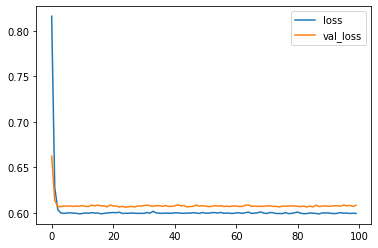

In [19]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

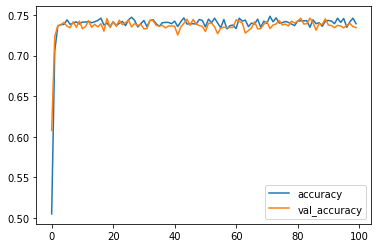

In [20]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### Simple RNN

In [24]:
inputs = np.expand_dims(X, -1)

# make RNN
_input = Input(shape=(T, D))
x = SimpleRNN(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 363us/sample - loss: 0.5967 - accuracy: 0.7264 - val_loss: 0.5896 - val_accuracy: 0.7432
Epoch 2/100
2500/2500 [==============================] - 0s 106us/sample - loss: 0.5732 - accuracy: 0.7452 - val_loss: 0.5623 - val_accuracy: 0.7508
Epoch 3/100
2500/2500 [==============================] - 0s 104us/sample - loss: 0.5353 - accuracy: 0.7520 - val_loss: 0.5028 - val_accuracy: 0.7456
Epoch 4/100
2500/2500 [==============================] - 0s 100us/sample - loss: 0.4771 - accuracy: 0.7732 - val_loss: 0.4491 - val_accuracy: 0.7708
Epoch 5/100
2500/2500 [==============================] - 0s 106us/sample - loss: 0.4367 - accuracy: 0.7756 - val_loss: 0.4201 - val_accuracy: 0.7716
Epoch 6/100
2500/2500 [==============================] - 0s 113us/sample - loss: 0.4107 - accuracy: 0.7848 - val_loss: 0.3894 - val_accuracy: 0.7948
Epoch 7/100
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 103us/sample - loss: 0.1012 - accuracy: 0.9684 - val_loss: 0.0939 - val_accuracy: 0.9712
Epoch 56/100
2500/2500 [==============================] - 0s 102us/sample - loss: 0.1021 - accuracy: 0.9660 - val_loss: 0.0962 - val_accuracy: 0.9684
Epoch 57/100
2500/2500 [==============================] - 0s 105us/sample - loss: 0.0978 - accuracy: 0.9668 - val_loss: 0.0886 - val_accuracy: 0.9752
Epoch 58/100
2500/2500 [==============================] - 0s 113us/sample - loss: 0.1017 - accuracy: 0.9616 - val_loss: 0.0904 - val_accuracy: 0.9728
Epoch 59/100
2500/2500 [==============================] - 0s 117us/sample - loss: 0.0960 - accuracy: 0.9680 - val_loss: 0.0888 - val_accuracy: 0.9768
Epoch 60/100
2500/2500 [==============================] - 0s 117us/sample - loss: 0.0952 - accuracy: 0.9680 - val_loss: 0.0892 - val_accuracy: 0.9712
Epoch 61/100
2500/2500 [==============================] - 0s 118us/sample - loss: 0.0926 - accuracy: 0.9676 - val

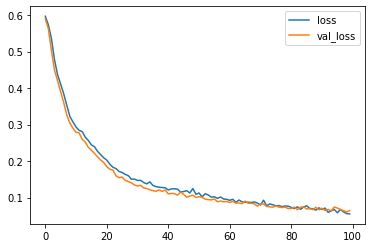

In [25]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

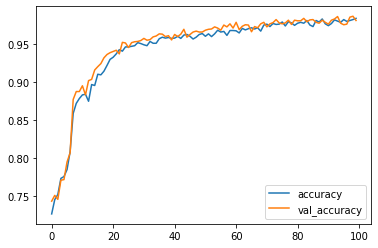

In [26]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

## LONG DISTANCE MODE

In [27]:
# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # short distance
    #y = get_label(x, -1, -2, -3)
    # long distance
    y = get_label(x, 0, 1, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

### Simple RNN

In [28]:
inputs = np.expand_dims(X, -1)

# make RNN
_input = Input(shape=(T, D))
x = SimpleRNN(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 417us/sample - loss: 0.7040 - accuracy: 0.4916 - val_loss: 0.6933 - val_accuracy: 0.5184
Epoch 2/100
2500/2500 [==============================] - 0s 114us/sample - loss: 0.6773 - accuracy: 0.5592 - val_loss: 0.6354 - val_accuracy: 0.6584
Epoch 3/100
2500/2500 [==============================] - 0s 126us/sample - loss: 0.5964 - accuracy: 0.7008 - val_loss: 0.6176 - val_accuracy: 0.6484
Epoch 4/100
2500/2500 [==============================] - 0s 123us/sample - loss: 0.5929 - accuracy: 0.7088 - val_loss: 0.5639 - val_accuracy: 0.7260
Epoch 5/100
2500/2500 [==============================] - 0s 114us/sample - loss: 0.5500 - accuracy: 0.7396 - val_loss: 0.5508 - val_accuracy: 0.7296
Epoch 6/100
2500/2500 [==============================] - 0s 115us/sample - loss: 0.5257 - accuracy: 0.7516 - val_loss: 0.6061 - val_accuracy: 0.6792
Epoch 7/100
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 108us/sample - loss: 0.3474 - accuracy: 0.8196 - val_loss: 0.3433 - val_accuracy: 0.8084
Epoch 56/100
2500/2500 [==============================] - 0s 101us/sample - loss: 0.3045 - accuracy: 0.8436 - val_loss: 0.2860 - val_accuracy: 0.8516
Epoch 57/100
2500/2500 [==============================] - 0s 102us/sample - loss: 0.3605 - accuracy: 0.8448 - val_loss: 0.3875 - val_accuracy: 0.8256
Epoch 58/100
2500/2500 [==============================] - 0s 103us/sample - loss: 0.4007 - accuracy: 0.8216 - val_loss: 0.3893 - val_accuracy: 0.8436
Epoch 59/100
2500/2500 [==============================] - 0s 104us/sample - loss: 0.3517 - accuracy: 0.8576 - val_loss: 0.3538 - val_accuracy: 0.8468
Epoch 60/100
2500/2500 [==============================] - 0s 102us/sample - loss: 0.3325 - accuracy: 0.8532 - val_loss: 0.3611 - val_accuracy: 0.8324
Epoch 61/100
2500/2500 [==============================] - 0s 101us/sample - loss: 0.3016 - accuracy: 0.8600 - val

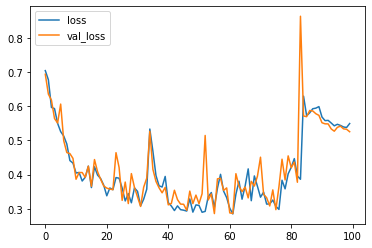

In [29]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

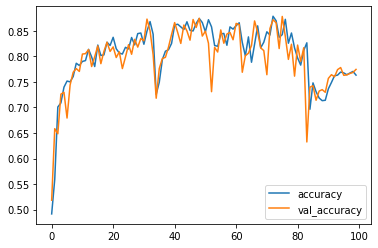

In [30]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

### Simple RNN

In [28]:
inputs = np.expand_dims(X, -1)

# make RNN
_input = Input(shape=(T, D))
x = SimpleRNN(5)(_input)
x = Dense(1, activation="sigmoid")(x)

model = Model(_input, x)
# compile
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

# train
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 417us/sample - loss: 0.7040 - accuracy: 0.4916 - val_loss: 0.6933 - val_accuracy: 0.5184
Epoch 2/100
2500/2500 [==============================] - 0s 114us/sample - loss: 0.6773 - accuracy: 0.5592 - val_loss: 0.6354 - val_accuracy: 0.6584
Epoch 3/100
2500/2500 [==============================] - 0s 126us/sample - loss: 0.5964 - accuracy: 0.7008 - val_loss: 0.6176 - val_accuracy: 0.6484
Epoch 4/100
2500/2500 [==============================] - 0s 123us/sample - loss: 0.5929 - accuracy: 0.7088 - val_loss: 0.5639 - val_accuracy: 0.7260
Epoch 5/100
2500/2500 [==============================] - 0s 114us/sample - loss: 0.5500 - accuracy: 0.7396 - val_loss: 0.5508 - val_accuracy: 0.7296
Epoch 6/100
2500/2500 [==============================] - 0s 115us/sample - loss: 0.5257 - accuracy: 0.7516 - val_loss: 0.6061 - val_accuracy: 0.6792
Epoch 7/100
2500/2500 [==============================] - 0

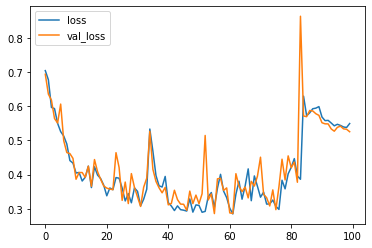

In [29]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

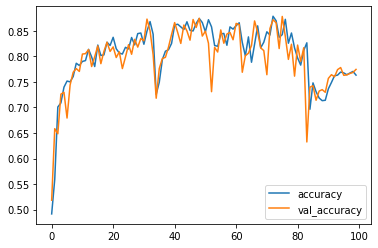

In [30]:
# plot loss per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();